<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Data-Optimization" data-toc-modified-id="Data-Optimization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Optimization</a></span><ul class="toc-item"><li><span><a href="#Marketing-events" data-toc-modified-id="Marketing-events-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Marketing events</a></span></li><li><span><a href="#Users" data-toc-modified-id="Users-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Users</a></span></li><li><span><a href="#Participants" data-toc-modified-id="Participants-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Participants</a></span></li><li><span><a href="#User-events" data-toc-modified-id="User-events-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>User events</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Funnels" data-toc-modified-id="Funnels-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Funnels</a></span></li><li><span><a href="#Number-of-events" data-toc-modified-id="Number-of-events-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Number of events</a></span></li><li><span><a href="#Distribution-of-events-over-time." data-toc-modified-id="Distribution-of-events-over-time.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Distribution of events over time.</a></span></li></ul></li><li><span><a href="#A/B-Test" data-toc-modified-id="A/B-Test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>A/B Test</a></span></li><li><span><a href="#Conclutions" data-toc-modified-id="Conclutions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclutions</a></span></li></ul></div>

# A/B Teting - Final Project 


# Recommender System Test


## Introduction


Sometimes we need to pick up where others left off :)  

In this project I will be exploring and A/B testing data from and online store. 

The goal of the test is to check the changes in conversion after inroduction of a new recommentadion system. 

The expectaion is to see an increase of 10% at least in conversion for the test participants at each stage of the funnel:
product page -> product card -> purchase, within 14 days of signing up.   

The data for the test was collected between 7.12.20 and 1.1.21.  

Test subjects - 15% of new users from EU region.  

The cutoff date for signing up was 21.12.20.  

Expected number of test paticipants is 6000. 

---

The project will include the following steps:   

1. General data exploration and optimization:   
- Does it need converting types?  
- Are there any missing or duplicate values? If so, what's their nature?  

2. EDA:   
- Study conversion at different funnel stages.  
- Is the number of events per user distributed equally in the samples?   
- Are there users who entered both samples?   
- How is the number of events distributed by days?  
- Think of the possible details in the data that you have to take into account before starting the A/B test?   

3. A/B testing:
- Using the z-criterion to check the statistical difference between the proportions. 
- Analysis of the test results.  

4. Conclusions.  


## Libraries


In [1]:
import pandas as pd

import numpy as np

import datetime as dt

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

from plotly import graph_objects as go

import scipy.stats as stats

from statsmodels.stats.proportion import proportions_ztest

from scipy import stats as st

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore");


## Data 


In [2]:
try:
    marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
except:
    marketing_events = pd.read_csv('C:\\Users\\Layet\\Desktop\\Projects\\AB Test - Final Project/ab_project_marketing_events_us.csv')
    
try:
    users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
except:
    users = pd.read_csv('C:/Users/Layet/Desktop/Projects/AB Test - Final Project/final_ab_new_users_upd_us.csv')
    
try:
    user_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
except:
    user_events = pd.read_csv('C:/Users/Layet/Desktop/Projects/AB Test - Final Project/final_ab_events_upd_us.csv')
    
try:
    participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
except:
    participants = pd.read_csv('C:/Users/Layet/Desktop/Projects/AB Test - Final Project/final_ab_participants_upd_us.csv')


## Data Optimization


### Marketing events


In [3]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


There are 14 marketing events listed. The dates are in an incorrect format. This will be changed. 


In [4]:
marketing_events.describe()

,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Christmas&New Year Promo,APAC,2020-12-25,2021-01-03
freq,1,4,1,1


There are 6 unique regions. 


In [5]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt']).apply(lambda x:x.strftime('%d-%m-%Y'))
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt']).apply(lambda x:x.strftime('%d-%m-%Y'))

Both start dt and finish dt columns were changed to datetime format. 


In [6]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",25-12-2020,03-01-2021
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",14-02-2020,16-02-2020
2,St. Patric's Day Promo,"EU, N.America",17-03-2020,19-03-2020
3,Easter Promo,"EU, CIS, APAC, N.America",12-04-2020,19-04-2020
4,4th of July Promo,N.America,04-07-2020,11-07-2020
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",26-11-2020,01-12-2020
6,Chinese New Year Promo,APAC,25-01-2020,07-02-2020
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",01-05-2020,03-05-2020
8,International Women's Day Promo,"EU, CIS, APAC",08-03-2020,10-03-2020
9,Victory Day CIS (May 9th) Event,CIS,09-05-2020,11-05-2020


There was a promotional event during the last week of the data collection in the relevant region.  
The data for this week might be inaccurate, as promotions bring sales and the data collected, might not reflect correctly the usual behavior of users. 


There are no missing or duplicated values. 


### Users


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


It looks like there are no missing values.  
The first date column is incorrect type. This will be changed. 


In [8]:
users.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,D72A72121175D8BE,2020-12-21,EU,Android
freq,1,6077,43396,26159


There are 58703 unique users from 4 regions, using 4 different device types.  
There are 17 sign-up dates. Those will need to be checked. Technical description of the test stated that last user sign up was before 21.12.20. 


In [9]:
users['region'] = users['region'].str.lower()
users['device'] = users['device'].str.lower()

In [10]:
users['first_date'] = pd.to_datetime(users['first_date']).apply(lambda x:x.strftime('%d-%m-%Y'))
print(users['first_date'].min())
print(users['first_date'].max())

07-12-2020
23-12-2020


In [11]:
users[users['first_date'] >= '21-12-2020'].count()

user_id       11340
first_date    11340
region        11340
device        11340
dtype: int64

There are 11340 users who signed up after the last sign up date. 


In [12]:
users.loc[(users['first_date'] >= '21-12-2020') & (users['region'] == 'eu')]

,user_id,first_date,region,device
10739,F8EFEFE5300E7AA6,21-12-2020,eu,pc
10741,8B280E35A960399E,21-12-2020,eu,pc
10742,88FD5CFFDBA32E32,21-12-2020,eu,iphone
10743,31FFA5EE2B84061B,21-12-2020,eu,iphone
10744,3783ABB36B76FC02,21-12-2020,eu,android
...,...,...,...,...
32118,165AFCBF42C043F8,23-12-2020,eu,pc
32119,54E7F36C0E976E24,23-12-2020,eu,android
32120,7E43EB2E03A33E78,23-12-2020,eu,pc
32121,B8B679DEE9F2CA06,23-12-2020,eu,pc


Out of them 8378 from the EU. 


In [13]:
users[users['region'] == 'eu'].count()

user_id       43396
first_date    43396
region        43396
device        43396
dtype: int64

There are 43396 unique users from the EU. As per the technical description of the test, the test participants are 15% of the EU users. As user behavior can be greatly affected by users background, because of different cultures, customs, holidays and habbits, comparing test subjects to a coltrol group from another region will not yield an accurate result.   Users from other regions will be dropped.  


In [14]:
print(len(users[users['region'] == 'eu']) - len(users.loc[(users['first_date'] >= '21-12-2020') & (users['region'] == 'eu')]))
print(len(users[users['region'] == 'eu']) / len(users.loc[(users['first_date'] >= '21-12-2020') & (users['region'] == 'eu')]))

35018
5.17975650513249


The users who do not meet the condition of being from the EU and signing up before the deadline are a little over 5% of the total. After removing them I will have 35018 users left. 


In [15]:
users.duplicated().sum()

0

There are no duplicated values.


In [16]:
users.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

There are no missing values. 


In [17]:
users_eu = users.query('region == "eu" and first_date < "21-12-2020" ')
print(users_eu.info())
print(users_eu.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35018 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     35018 non-null  object
 1   first_date  35018 non-null  object
 2   region      35018 non-null  object
 3   device      35018 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB
None
            user_id  first_date region   device
0  D72A72121175D8BE  07-12-2020     eu       pc
2  2E1BF1D4C37EA01F  07-12-2020     eu       pc
3  50734A22C0C63768  07-12-2020     eu   iphone
7  8942E64218C9A1ED  07-12-2020     eu       pc
9  FFCEA1179C253104  07-12-2020     eu  android


The approplriate users were weeded out of the original df. 


### Participants


In [18]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


It looks like there are no missing values.   


In [19]:
participants.describe()

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,307C06C0E6F09B93,A,interface_eu_test
freq,2,8214,10850


It looks like there are some duplicates in the data as unique user ids are less than the count. Also, it looks like there are two test names. I will look into this and try to identify if it is an register problem or something else.  


In [20]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [21]:
participants['ab_test'].value_counts()

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

There are indeed two different tests in the data. This is a problem for the testing as we cannot know what change to the system affected the user behavior. So all users that had partaken in two test need to be removed for accurate test results.  
Another problem is that we have only 3675 user who have been part of the test I am conducting. This is before checking if there are users that belong to both groups or both tests. The expected number was 6000. This is a very small sample that might not yield trustworthy results. 


In [22]:
doubles = participants.groupby(['user_id'])['group', 'ab_test'].nunique().reset_index().query('group > 1 or ab_test > 1')
doubles

,user_id,group,ab_test
1,001064FEAAB631A1,1,2
8,00341D8401F0F665,1,2
23,0082295A41A867B5,2,2
38,00E68F103C66C1F7,2,2
41,00EFA157F7B6E1C4,1,2
...,...,...,...
13576,FEA0C585A53E7027,2,2
13582,FEC0BCA6C323872F,2,2
13605,FF2174A1AA0EAD20,1,2
13610,FF44696E39039D29,1,2


There are 887 users who either belong to both groups or both tests. 


In [23]:
one_group_doubles = doubles.query('group == 1 and ab_test == 2')
one_group_doubles

,user_id,group,ab_test
1,001064FEAAB631A1,1,2
8,00341D8401F0F665,1,2
41,00EFA157F7B6E1C4,1,2
81,01B9975CAE144B78,1,2
94,020A95B66F363AFB,1,2
...,...,...,...
13446,FC37CBE8211E02A8,1,2
13480,FCF70F6E1871BD78,1,2
13567,FE82D7FC50D4155B,1,2
13605,FF2174A1AA0EAD20,1,2


Out of 887, 446 users belong only to one group, but to two tests. I might use the ones belonging to group A as A is the control group and by definition this group did not experince any changes with the interface or the recommender sytem. 


In [24]:
check_dbls = participants[participants['user_id'].isin(one_group_doubles['user_id'])]
print(check_dbls)
print(check_dbls['group'].value_counts())
print(check_dbls['ab_test'].value_counts())
print(check_dbls.query('group == "A" and ab_test == "recommender_system_test" '))

                user_id group                  ab_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
8      B3A2485649E4A012     A  recommender_system_test
17     5D5E6EE92AF6E9E0     B  recommender_system_test
19     0F1FF07B3788976D     A  recommender_system_test
...                 ...   ...                      ...
14412  C7D1A5A6F6BAD476     A        interface_eu_test
14433  7DF21AEB1AA231F9     B        interface_eu_test
14445  EA6EA431FF84563B     B        interface_eu_test
14470  70BF82527E6ED9C3     A        interface_eu_test
14487  EF2E4FAF26951358     A        interface_eu_test

[892 rows x 3 columns]
A    680
B    212
Name: group, dtype: int64
recommender_system_test    446
interface_eu_test          446
Name: ab_test, dtype: int64
               user_id group                  ab_test
2     DABC14FDDFADD29E     A  recommender_system_test
3     04988C5DF189632E     A  recommender_system_test
8     B3A2485649E4A0

There are 340 users with the correct test in group A. 


In [25]:
check_dbls_clean = check_dbls.query('group == "A" and ab_test == "recommender_system_test" ')

I created a df with users from group A that took part in the correct test.


In [26]:
doubles_clean = doubles[~doubles['user_id'].isin(check_dbls_clean['user_id'])]

Removed them from the doubles df.


In [27]:
participants_new = participants[~participants['user_id'].isin(doubles_clean['user_id'])]

Removed the problematic users from the original df.


In [28]:
ab_test_par = participants_new.query('ab_test == "recommender_system_test"')
print(ab_test_par.head())
print(ab_test_par['group'].value_counts())

            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test
A    2422
B     706
Name: group, dtype: int64


Final stage in preparing the test df is to remove the participants in the second test. 


In [29]:
print(ab_test_par.isnull().sum())
print(ab_test_par.duplicated().sum())

user_id    0
group      0
ab_test    0
dtype: int64
0


There are no missing or duplicated values.  
The numbers I have for the test after cleaning the data are 2422 uses in group A and 706 users in group B.

In [30]:
ab_test_par = ab_test_par[ab_test_par['user_id'].isin(users_eu['user_id'])]
ab_test_par['group'].value_counts()                      

A    1932
B     593
Name: group, dtype: int64

After excluding non-EU users, I have 1932 users in group A and 593 users in group B.

### User events


In [31]:
user_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


It looks like there are some missing values in the details column. The event dt column is in incorrect format. 


In [32]:
user_events.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


The mean is higher than the median, so the distribution is skewed to the right. The max is significantly higher than the Q3 value, so I expect to find some outliers. 


In [33]:
user_events.describe(include=[object])

,user_id,event_dt,event_name
count,423761,423761,423761
unique,58703,257138,4
top,A3917F81482141F2,2020-12-14 18:54:55,login
freq,36,10,182465


There are 4 different types of events. 


In [34]:
user_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [35]:
user_events['event_dt'] = pd.to_datetime(user_events['event_dt'])

User events column transfored to the appropriate type. 


In [36]:
user_events_eu = user_events[user_events['user_id'].isin(ab_test_par['user_id'])].reset_index()
user_events_eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16887 entries, 0 to 16886
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       16887 non-null  int64         
 1   user_id     16887 non-null  object        
 2   event_dt    16887 non-null  datetime64[ns]
 3   event_name  16887 non-null  object        
 4   details     2280 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 659.8+ KB


Filtering the df - to include only participants of the test and the control group. 


In [37]:
print(user_events_eu.isnull().sum())
print(user_events_eu.duplicated().sum())

index             0
user_id           0
event_dt          0
event_name        0
details       14607
dtype: int64
0


There are no duplicates.  
Missing values only in the details column. 


In [38]:
print(user_events_eu['details'].nunique())
print(user_events_eu['details'].value_counts())

4
4.99      1687
9.99       350
99.99      210
499.99      33
Name: details, dtype: int64


It looks like the details column has only prices.  


In [39]:
user_events_eu.sample(5)

,index,user_id,event_dt,event_name,details
5762,154961,A8C69B602A3D4A32,2020-12-14 12:44:31,product_page,NaN
596,19238,F138DA14130E06EA,2020-12-15 09:17:42,purchase,9.99
3793,95342,55212FE14BE9ACF4,2020-12-20 00:53:16,product_cart,NaN
6588,173036,1FC5EFE587A74381,2020-12-17 09:43:51,product_page,NaN
11263,292282,F2A7DA882BF8ECD6,2020-12-14 16:34:06,login,NaN


After looking at several samples, I noticed that only the purchase event has values in the details column, which is logical if there are only prices found in this column. 


In [40]:
detailes_check = user_events_eu[user_events_eu['event_name'] != 'purchase']
print(len(detailes_check))
print(detailes_check.isnull().sum())

14607
index             0
user_id           0
event_dt          0
event_name        0
details       14607
dtype: int64


Wanted to make sure that none of the other events have values in the details column. 


In [41]:
user_events_eu.columns = user_events_eu.columns.str.replace('details', 'total')
user_events_eu['total'] = user_events_eu['total'].fillna(0.00)
user_events_eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16887 entries, 0 to 16886
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       16887 non-null  int64         
 1   user_id     16887 non-null  object        
 2   event_dt    16887 non-null  datetime64[ns]
 3   event_name  16887 non-null  object        
 4   total       16887 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 659.8+ KB


The column was renamed. Missing values filled with 0. Df is ready for the last stage. 


In [42]:
user_events_tests = pd.merge(user_events_eu, ab_test_par, on='user_id')
print(user_events_tests.info())
print(user_events_tests.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16887 entries, 0 to 16886
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       16887 non-null  int64         
 1   user_id     16887 non-null  object        
 2   event_dt    16887 non-null  datetime64[ns]
 3   event_name  16887 non-null  object        
 4   total       16887 non-null  float64       
 5   group       16887 non-null  object        
 6   ab_test     16887 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.0+ MB
None
   index           user_id            event_dt    event_name  total group  \
0      5  831887FE7F2D6CBA 2020-12-07 06:50:29      purchase   4.99     A   
1   3382  831887FE7F2D6CBA 2020-12-09 02:19:17      purchase  99.99     A   
2  60320  831887FE7F2D6CBA 2020-12-07 06:50:30  product_cart   0.00     A   
3  61897  831887FE7F2D6CBA 2020-12-08 10:52:27  product_cart   0.0

User events table was merged with the A/B test table.   
After the cleaning of the data, I have 16887 rows left.  
The data is prepared for analysis.  

## EDA


In [43]:
first_date = users_eu.groupby(['first_date']).count().reset_index()
first_date

,first_date,user_id,region,device
0,07-12-2020,3918,3918,3918
1,08-12-2020,2212,2212,2212
2,09-12-2020,1521,1521,1521
3,10-12-2020,2074,2074,2074
4,11-12-2020,1647,1647,1647
5,12-12-2020,2629,2629,2629
6,13-12-2020,3026,3026,3026
7,14-12-2020,4048,4048,4048
8,15-12-2020,2173,2173,2173
9,16-12-2020,1565,1565,1565


In [44]:
user_events_tests = pd.merge(user_events_tests, users_eu, on='user_id')
user_events_tests

,index,user_id,event_dt,event_name,total,group,ab_test,first_date,region,device
0,5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,07-12-2020,eu,android
1,3382,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,07-12-2020,eu,android
2,60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test,07-12-2020,eu,android
3,61897,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test,07-12-2020,eu,android
4,63642,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test,07-12-2020,eu,android
...,...,...,...,...,...,...,...,...,...,...
16882,356731,FD83244D94C592DB,2020-12-20 09:37:08,login,0.00,A,recommender_system_test,20-12-2020,eu,pc
16883,414572,FD83244D94C592DB,2020-12-27 08:32:12,login,0.00,A,recommender_system_test,20-12-2020,eu,pc
16884,356850,0F7D49FC184EDCDE,2020-12-20 04:04:27,login,0.00,A,recommender_system_test,20-12-2020,eu,pc
16885,370911,0F7D49FC184EDCDE,2020-12-21 04:26:57,login,0.00,A,recommender_system_test,20-12-2020,eu,pc


In [45]:
user_events_tests['event_date'] = user_events_tests['event_dt'].apply(lambda x:x.strftime('%d-%m-%Y'))
user_events_tests.sample()

,index,user_id,event_dt,event_name,total,group,ab_test,first_date,region,device,event_date
5603,101887,3E6222A7C0D4CFC0,2020-12-21 04:37:14,product_cart,0.0,A,recommender_system_test,19-12-2020,eu,iphone,21-12-2020


In [46]:
user_events_tests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16887 entries, 0 to 16886
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       16887 non-null  int64         
 1   user_id     16887 non-null  object        
 2   event_dt    16887 non-null  datetime64[ns]
 3   event_name  16887 non-null  object        
 4   total       16887 non-null  float64       
 5   group       16887 non-null  object        
 6   ab_test     16887 non-null  object        
 7   first_date  16887 non-null  object        
 8   region      16887 non-null  object        
 9   device      16887 non-null  object        
 10  event_date  16887 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.5+ MB


In [47]:
user_events_tests['event_date'] = pd.to_datetime(user_events_tests['event_date'])
user_events_tests['first_date'] = pd.to_datetime(user_events_tests['first_date'])

In [48]:
user_events_tests = user_events_tests[((user_events_tests['event_date'] - user_events_tests['first_date']).astype('timedelta64[D]'))<=14]

In [49]:
user_events_tests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13870 entries, 0 to 16886
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       13870 non-null  int64         
 1   user_id     13870 non-null  object        
 2   event_dt    13870 non-null  datetime64[ns]
 3   event_name  13870 non-null  object        
 4   total       13870 non-null  float64       
 5   group       13870 non-null  object        
 6   ab_test     13870 non-null  object        
 7   first_date  13870 non-null  datetime64[ns]
 8   region      13870 non-null  object        
 9   device      13870 non-null  object        
 10  event_date  13870 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [50]:
user_events_tests.groupby(['group']).agg({'user_id':'nunique'})

,user_id
group,
A,1926
B,587


After excluding users that had their event more than 14 days after sign up, I have 1926 users in group A and 587 users in group B.  
Previous numbers were 1932 users in group A and 593 users in group B.  


In [51]:
user_events_tests['user_id'].nunique() / users_eu['user_id'].nunique()

0.07176309326632017

Yet another problem with this data set. Test subjects are supposed to be 15% out of new users in EU. They are a bit over 7%. 


### Funnels 


In [52]:
user_events_tests.sample(5)

,index,user_id,event_dt,event_name,total,group,ab_test,first_date,region,device,event_date
13237,190579,AC07099C53E86F19,2020-12-20 00:57:11,product_page,0.00,A,recommender_system_test,2020-12-15,eu,android,2020-12-20
4085,23853,3EFC6AF8B370AD88,2020-12-16 23:32:33,purchase,9.99,B,recommender_system_test,2020-12-16,eu,android,2020-12-16
3453,202125,86E5AC06DAA6521E,2020-12-21 03:53:54,product_page,0.00,A,recommender_system_test,2020-12-15,eu,pc,2020-12-21
14359,180694,E4111A6C304075D8,2020-12-18 03:00:38,product_page,0.00,A,recommender_system_test,2020-12-18,eu,android,2020-12-18
6240,118845,4FF2998A348C484F,2020-12-28 20:00:24,product_cart,0.00,A,recommender_system_test,2020-12-20,eu,mac,2020-12-28


In [53]:
user_events_tests[user_events_tests['user_id'] == 'EE24621F3C564C74']

,index,user_id,event_dt,event_name,total,group,ab_test,first_date,region,device,event_date
4894,29798,EE24621F3C564C74,2020-12-18 00:32:22,purchase,4.99,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18
4895,32550,EE24621F3C564C74,2020-12-19 07:50:58,purchase,4.99,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19
4896,89991,EE24621F3C564C74,2020-12-18 00:32:22,product_cart,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18
4897,92797,EE24621F3C564C74,2020-12-19 07:51:01,product_cart,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19
4898,180308,EE24621F3C564C74,2020-12-18 00:32:22,product_page,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18
4899,185788,EE24621F3C564C74,2020-12-19 07:50:59,product_page,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19
4900,331601,EE24621F3C564C74,2020-12-18 00:32:22,login,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18
4901,339898,EE24621F3C564C74,2020-12-19 07:50:58,login,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19


In [54]:
def sequence(user):
    user_seq=user_events_tests[user_events_tests['user_id'] == user].sort_values(by=['user_id','event_dt'])
    return user_seq['event_name'].drop_duplicates().to_list()

In [55]:
sequence('EE24621F3C564C74')

['purchase', 'product_cart', 'product_page', 'login']

In [56]:
sequence_empty=[]
for i in user_events_tests['user_id'].unique():
    sequence_empty.append([i,tuple(sequence(i))])
    
logs_path=pd.DataFrame(sequence_empty,columns=['user','path'])
logs_path['path'].value_counts().head(15)

(login,)                                         491
(login, product_page)                            408
(product_page, login)                            328
(purchase, login, product_page)                  208
(purchase, login)                                160
(purchase, product_page, login)                  153
(login, product_cart)                            114
(product_cart, login)                             85
(login, product_cart, product_page)               79
(product_cart, product_page, login)               78
(product_page, login, product_cart)               56
(product_cart, login, product_page)               56
(purchase, login, product_cart)                   51
(purchase, login, product_cart, product_page)     47
(purchase, product_cart, login)                   40
Name: path, dtype: int64

In [57]:
user_events_tests[(user_events_tests['user_id'] == 'EE24621F3C564C74') & (user_events_tests['event_dt'] == '2020-12-18 00:32:22')]

,index,user_id,event_dt,event_name,total,group,ab_test,first_date,region,device,event_date
4894,29798,EE24621F3C564C74,2020-12-18 00:32:22,purchase,4.99,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18
4896,89991,EE24621F3C564C74,2020-12-18 00:32:22,product_cart,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18
4898,180308,EE24621F3C564C74,2020-12-18 00:32:22,product_page,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18
4900,331601,EE24621F3C564C74,2020-12-18 00:32:22,login,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-18


In [58]:
user_events_tests[(user_events_tests['user_id'] == 'EE24621F3C564C74') & ~(user_events_tests['event_dt'] == '2020-12-18 00:32:22')]

,index,user_id,event_dt,event_name,total,group,ab_test,first_date,region,device,event_date
4895,32550,EE24621F3C564C74,2020-12-19 07:50:58,purchase,4.99,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19
4897,92797,EE24621F3C564C74,2020-12-19 07:51:01,product_cart,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19
4899,185788,EE24621F3C564C74,2020-12-19 07:50:59,product_page,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19
4901,339898,EE24621F3C564C74,2020-12-19 07:50:58,login,0.00,A,recommender_system_test,2020-12-18,eu,mac,2020-12-19


When looking at the sequences, I find more problems with this data.  
The top 3 look logical: users login, then go to product page. Sometimes get to a product page and then login, which is possible if you enter the site with an external link for a product.   
Numbers 4,5,6 on this list, however, raise some questions. It looks like the purchase was made before the login or looking at the product page. I chose a random user that went through all 4 stages. When I looked at his data I could see that the timestamps are a bit problematic. On the purchase made on 18.12, it looks like all 4 stages were made within one second, on the purchase made on 19.12, login and purchase were made on the same socond, but the product and the cart were viewed later.  
What I conclude from this is that the timestamping on either on the site itself or during data aggregation and transfer does not work properly. 


In [59]:
funnel_by_groups=[]
for i in user_events_tests['group'].unique():
    group=user_events_tests[user_events_tests['group'] == i].groupby(
        ['event_name','group'])['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)
    group_in = group.reindex(index=[0,2,1,3])
    display(group_in)
    funnel_by_groups.append(group_in)

,event_name,group,user_id
0,login,A,1926
2,product_page,A,1244
1,product_cart,A,593
3,purchase,A,617


,event_name,group,user_id
0,login,B,582
2,product_page,B,323
1,product_cart,B,167
3,purchase,B,164


In [60]:
funnel_by_groups = pd.concat(funnel_by_groups)
funnel_by_groups

,event_name,group,user_id
0,login,A,1926
2,product_page,A,1244
1,product_cart,A,593
3,purchase,A,617
0,login,B,582
2,product_page,B,323
1,product_cart,B,167
3,purchase,B,164


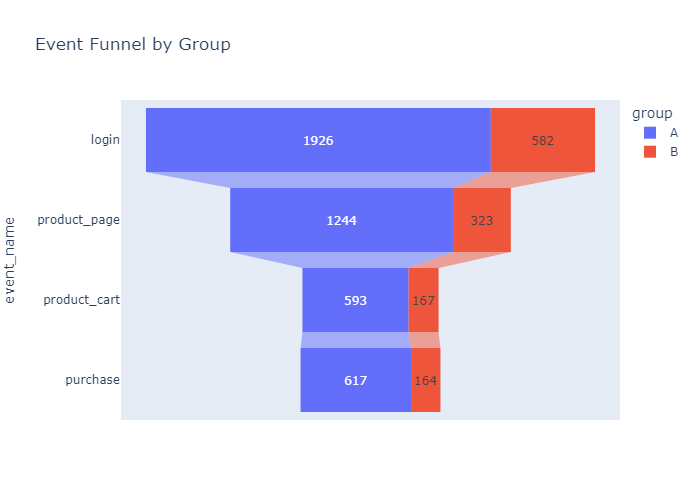

In [61]:
fig=px.funnel(
    funnel_by_groups, 
    x='user_id', 
    y='event_name',
    color='group', 
    title='Event Funnel by Group')
fig.show(renderer='png')

Group A is disproportionaly larger than group B.  
Also, in group A less users arrived to the product cart stage than to the purchase stage. It is possible that a user can check out without looking at the cart.   
In group B, product cart and purchase stages have almost the same number of users. However this does mean that all who got to the cart paid as well. As with group A, some users might get to the purchase stage without looking at the cart. So when we looking at the funnel it is imossible to conclude that those users were converted.  


In [62]:
g_a = funnel_by_groups[funnel_by_groups['group'] == 'A']
g_b = funnel_by_groups[funnel_by_groups['group'] == 'B']

In [63]:
g_a
g_b

,event_name,group,user_id
0,login,B,582
2,product_page,B,323
1,product_cart,B,167
3,purchase,B,164


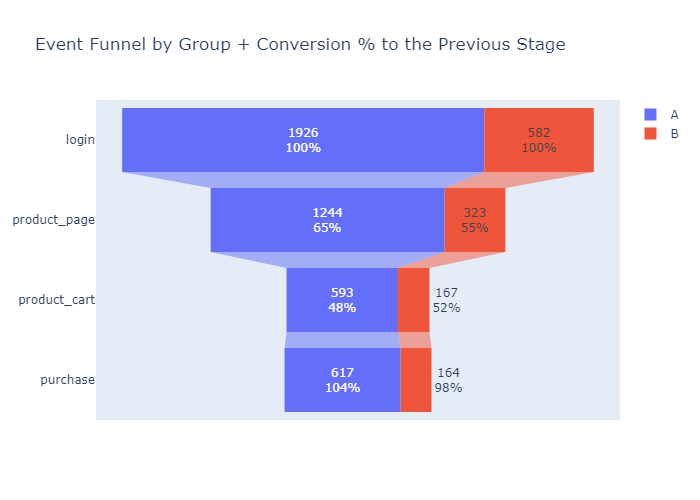

In [64]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    x = g_a['user_id'],
    y = g_a['event_name'],
    orientation = 'h',
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'B',
    x = g_b['user_id'],
    y = g_b['event_name'],
    orientation = 'h',
    textinfo = "value+percent previous"))

fig.update_layout(title_text='Event Funnel by Group + Conversion % to the Previous Stage')

fig.show(renderer='png')

The expectaion was to see an increase of 10% at least in conversion for the test participants at each stage of the funnel: product page -> product card -> purchase within 14 days of signing up.   
When looking at the funnel that includes the percentages of conversion between each stage and its predecessor, only the product card stage has higher conversion in group B and it is only 4%.   
So group A definetly preforms better in terms of conversion.   


### Number of events


In [65]:
n_events = user_events_tests.groupby(['user_id', 'group'], as_index=False).agg({'event_name': 'count'})
n_events.sort_values(by = 'event_name', ascending=False)

,user_id,group,event_name
2057,CED71698585A2E46,A,24
284,1BFEE479308EFF44,A,24
1091,6E3DF9C69A6B607E,A,21
1289,8378F834617AA310,A,20
2449,F9D53F0BA957F728,A,20
...,...,...,...
598,3D960D370AF76942,A,1
2387,F3A05C8D912975AB,B,1
2135,D7663B1CF2680ECB,A,1
2282,E85E1F634E368569,A,1


In [66]:
ev_a = n_events[n_events['group'] == 'A']
ev_b = n_events[n_events['group'] == 'B']

print('The average number of events per user in group A is', ev_a['event_name'].mean())
print('The average number of events per user in group B is', ev_b['event_name'].mean())

The average number of events per user in group A is 6.0114226375908615
The average number of events per user in group B is 3.9045996592844974


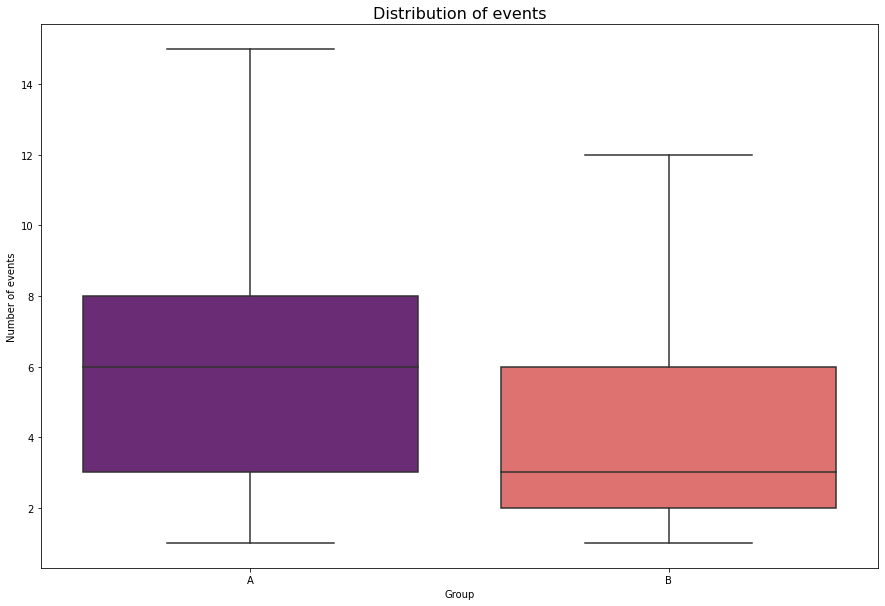

In [67]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=n_events, x='group', y='event_name', palette='magma', showfliers= False)
plt.title('Distribution of events', size=16)
plt.ylabel('Number of events')
plt.xlabel('Group')
plt.show();

On average, users in group A have 6 events, while users in group B have almost 4.  
The median is also higher for group A - 6, while for group B it is 3.


### Distribution of events over time. 


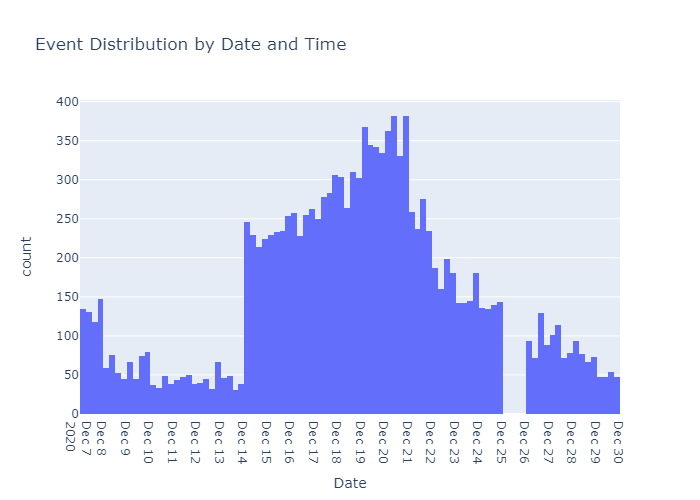

In [68]:
fig = px.histogram(
    user_events_tests, x='event_dt', title='Event Distribution by Date and Time', labels={'event_dt':'Date',
                                                                                        'count':'Number of events'}
)
fig.update_xaxes(dtick="D1")
fig.show(renderer='png')

There is no data for Dec 25th. There are several possible reasons for that. It is Christmas and people in EU celebrate not by shopping (it is too late to buy presents now :)), site/server was down, there was a problem with data colection or transfer.  
Same is for Dec 30th.  
The number of events greatly increases between Dec 14th and Dec 21st. As this is the time for holiday shopping, collecting data for an A/B test at this time in not a good idea as we cannot rely on those result to represent user behavior.   


In [69]:
for_bar = user_events_tests.groupby(['event_date', 'group']).agg({'event_name':'count'}).reset_index()
for_bar

,event_date,group,event_name
0,2020-07-12,A,263
1,2020-07-12,B,268
2,2020-08-12,A,176
3,2020-08-12,B,56
4,2020-09-12,A,154
5,2020-09-12,B,111
6,2020-10-12,A,108
7,2020-10-12,B,50
8,2020-11-12,A,157
9,2020-11-12,B,24


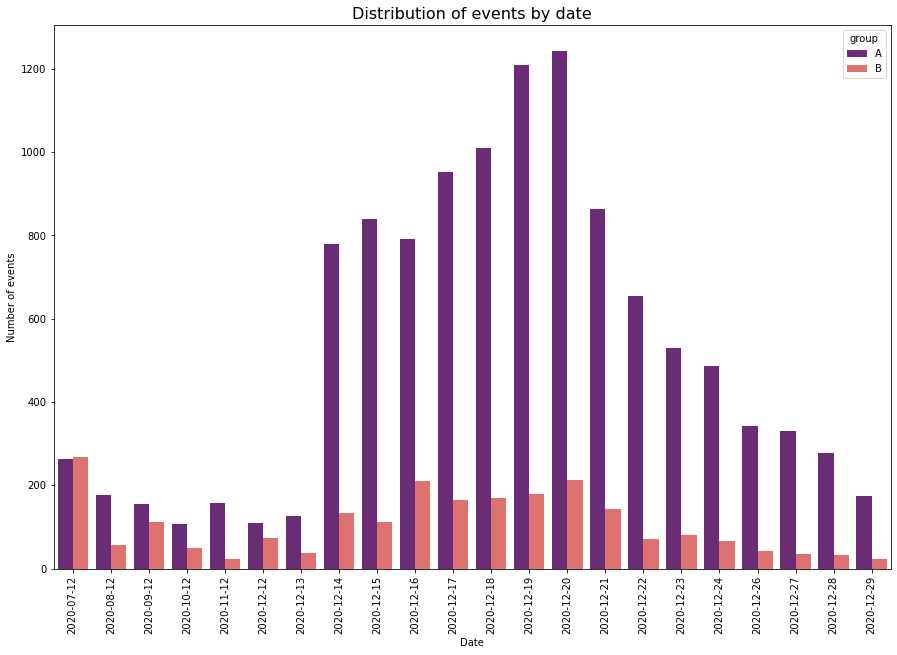

In [70]:
for_bar.event_date=for_bar.event_date.astype(str)

plt.figure(figsize=(15,10));
ax = sns.barplot(data = for_bar, x='event_date', y='event_name', hue='group', palette='magma');
plt.title('Distribution of events by date', size=16);
plt.ylabel('Number of events');
plt.xlabel('Date');
plt.xticks(rotation = 90);
plt.show();

The distribution of group B is different from group A. There is no increase between the 14th to 21st. The numbers remain stable for this dates and decrease event more when the decrease for group A begins after the 21st.   


In [71]:
user_events_tests

,index,user_id,event_dt,event_name,total,group,ab_test,first_date,region,device,event_date
0,5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-07-12,eu,android,2020-07-12
2,60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test,2020-07-12,eu,android,2020-07-12
5,241317,831887FE7F2D6CBA,2020-12-07 06:50:29,login,0.00,A,recommender_system_test,2020-07-12,eu,android,2020-07-12
8,17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-07-12,eu,pc,2020-07-12
9,120477,3C5DD0288AC4FE23,2020-12-07 19:42:40,product_page,0.00,A,recommender_system_test,2020-07-12,eu,pc,2020-07-12
...,...,...,...,...,...,...,...,...,...,...,...
16882,356731,FD83244D94C592DB,2020-12-20 09:37:08,login,0.00,A,recommender_system_test,2020-12-20,eu,pc,2020-12-20
16883,414572,FD83244D94C592DB,2020-12-27 08:32:12,login,0.00,A,recommender_system_test,2020-12-20,eu,pc,2020-12-27
16884,356850,0F7D49FC184EDCDE,2020-12-20 04:04:27,login,0.00,A,recommender_system_test,2020-12-20,eu,pc,2020-12-20
16885,370911,0F7D49FC184EDCDE,2020-12-21 04:26:57,login,0.00,A,recommender_system_test,2020-12-20,eu,pc,2020-12-21


## A/B Test

In [72]:
test_pivot = user_events_tests.pivot_table(
    index='event_name', columns='group', values='user_id', aggfunc='nunique'
    ).sort_values(by='B', ascending=False).reset_index()
test_pivot

group,event_name,A,B
0,login,1926,582
1,product_page,1244,323
2,product_cart,593,167
3,purchase,617,164


In [73]:
def check_hypothesis(group1, group2, event, alpha=0.05):
    success1=test_pivot[test_pivot['event_name']==event][group1].iloc[0]
    success2=test_pivot[test_pivot['event_name']==event][group2].iloc[0]
    
    trials1=user_events_tests[user_events_tests['group']==group1]['user_id'].nunique()
    trials2=user_events_tests[user_events_tests['group']==group2]['user_id'].nunique()
    
    stst, p_value = proportions_ztest([success1, success2], [trials1, trials2])
    
    print('P_value : {0:.5f}'.format(p_value))
    
    if (p_value < alpha):
        print('Null Hypothesis for', event, 'is rejected.')
        print('There is a significant difference in proportions between groups', group1, 'and', group2)
        print()
    else:
        print('Failed to reject the Null Hypothesis for', event)
        print('There is no reason to consider the proportions between groups', group1, 'and', group2, 'being different.')
        print()

H0: Proportions of group A == Proportions of group B    
H1: Proportions of group A != Proportions of group B  


In [74]:
for i in test_pivot['event_name'].unique():
    check_hypothesis('A','B',i,alpha=0.05)

P_value : 0.00005
Null Hypothesis for login is rejected.
There is a significant difference in proportions between groups A and B

P_value : 0.00003
Null Hypothesis for product_page is rejected.
There is a significant difference in proportions between groups A and B

P_value : 0.27999
Failed to reject the Null Hypothesis for product_cart
There is no reason to consider the proportions between groups A and B being different.

P_value : 0.06045
Failed to reject the Null Hypothesis for purchase
There is no reason to consider the proportions between groups A and B being different.



For login, I got p_value of 0.0005 and for product page event, I got a p_value of 0.00003. Both are lower than the alpha set at 0.05, so the Null Hypothesis is rejected and I can state that the proportions between group A and B are differents.   
For the other two, I fail to reject the Null Hypothesis, so there is no reason to consider that the proportions of the two groups, are significantly different. 


As there were 4 tests conducted, I will use the Bonferroni correction to calculate what the new level of significance should be, to avoid type I mistake.  


In [75]:
new_alpha = 0.05 / 4
new_alpha

0.0125

In [76]:
for i in test_pivot['event_name'].unique():
    check_hypothesis('A','B',i,alpha=0.01)

P_value : 0.00005
Null Hypothesis for login is rejected.
There is a significant difference in proportions between groups A and B

P_value : 0.00003
Null Hypothesis for product_page is rejected.
There is a significant difference in proportions between groups A and B

P_value : 0.27999
Failed to reject the Null Hypothesis for product_cart
There is no reason to consider the proportions between groups A and B being different.

P_value : 0.06045
Failed to reject the Null Hypothesis for purchase
There is no reason to consider the proportions between groups A and B being different.



When testing the hypotheses with a new alpha set at 0.01, I get the same result as with alpha of 0.05.   


## Conclutions


Although at no point I was tempted to go and start a watermelon farm in Brazil, I do understand the circumstances that have brought the previous analyst to do so.   

There are several major problems with how this data was collected:  
1. It was collected in the weeks before the winter holidays in the EU. So there is no way to know if it represents correct user behavior.  
2. There was a winter promotion during some of the dates while the data was collected.   
3. There were gaps in the data for certan dates with no explanation.   
4. There were users who belonged to both groups. 
5. There were users who signed up after the date set as the last sign up date.  
6. There were problems with the timestamps of the events.  
7. There were less users than expected. Expectation was 15% of new EU users, but I had alittle bit over 7%.   
8. The expected number was 6000 while I had 2513.         
9. There were two tests and some users belonged to both. In test population, this prevents us from knowing what version of the site the test subject saw and which of them affected his behavior, if any did.  
10. And finaly, after cleaning the data from all of the above, the samples were too small and one group had significantly larger number of participants.   

So any results I got, needs to be taken with a grain of salt.   

With that being said, those were the steps taken:  

1. All for dfs were loaded and examined.  
2. All columns with incorrect types were transformed.  
3. All dfs were checked for duplicated and missing values and those were corrected as needed or dropped.
4. All users from outside of EU were excluded as user behavior is greatly affected by culture and local customs.  
5. All users who belonged to both groups were dropped.  
6. All users in group B who belonged to both tests were dropped.  
7. Users that belonged to group A in both tests stayed in the control group as by definition this group does not experince any changes.  
8. All users who signed up after the last day of signup were dropped.  
9. All users who have logged events 14 days after initial sign up were dropped.    

After those drastic cuts, I was left with 1926 users in group A and 587 users in group B.   

When examining the funnels, I discovered that there might be a problems with the timestamps, as the event sequences do not make any sence.  
Group B did not show the expected increase of 10% at each funnel stage.  

The average number of events per user in group A is 6.  
The average number of events per user in group B is 4.  

When analyzing the number of events per day, there were gaps with missing data for an entire day and their nature is not clear.  
There was also an increase in activity between 14-21.12.20, but there is no way to determine what brought it. 

The A/B test was conducted with two levels of significance, 0.05 and 0.01.  
In both cases th Null hypothesis was rejected for the login and product page stages of the funnel. So it looks like there is a significal statistical difference in proportions between the two groups at those stages.  
I failed to reject the Null Hypothesis for the remaining two stages with both significance levels, so there is no ground to consider significant statistical difference in proportions between group A and group B.   

My conclusion and recomendation is that this test needs to be conducted again with all of the above mentioned problems taken into consideration. None of the results I got are trustworthy. 

---